<a href="https://colab.research.google.com/github/FunSizeNanoByte/kitkats/blob/Collab/Ml_scaling_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#^same thinng as from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [ ]:
df=pd.read_csv('student.csv')
df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['math_score'].min()

0

In [ ]:
df['math_score'].max()

100

##<font color='Blue'> Rescale math_score to min max scale of 0 and 1 </font>
this will make all the scores range from 0 to 1

In [ ]:
scaler_01=MinMaxScaler()
#^this is how we defined a scaler
columns_to_normalize = ['math_score']
#^defines the column you want to transform
df[columns_to_normalize] = scaler_01.fit_transform(df[columns_to_normalize])
#    ^this applies a math score now and applies a minmax scaler   ^this make it 0-1
df.head()

,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,0.72,72,74
1,female,group C,some college,standard,completed,0.69,90,88
2,female,group B,master's degree,standard,none,0.90,95,93
3,male,group A,associate's degree,free/reduced,none,0.47,57,44
4,male,group C,some college,standard,none,0.76,78,75


#I want to keep one decimal for comun math_score

In [ ]:
df[columns_to_normalize] = df[columns_to_normalize].round(2)
#^this rounds the scores to 2 decimals
df.head()


,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,0.72,72,74
1,female,group C,some college,standard,completed,0.69,90,88
2,female,group B,master's degree,standard,none,0.90,95,93
3,male,group A,associate's degree,free/reduced,none,0.47,57,44
4,male,group C,some college,standard,none,0.76,78,75


##NORMALIZATION


In [ ]:
reading_max=df['reading_score'].max()
reading_min=df['reading_score'].min()
reading_mean=df['reading_score'].mean()
reading_min, reading_max, reading_mean

(17, 100, 69.169)

In [ ]:
df['new_reading_score']=(df['reading_score']-reading_mean) / (reading_max-reading_min)
df.head()


,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new_reading_score
0,female,group B,bachelor's degree,standard,none,0.72,72,0.391492,0.034108
1,female,group C,some college,standard,completed,0.69,90,1.313269,0.250976
2,female,group B,master's degree,standard,none,0.90,95,1.642475,0.311217
3,male,group A,associate's degree,free/reduced,none,0.47,57,-1.583744,-0.146614
4,male,group C,some college,standard,none,0.76,78,0.457333,0.106398


##rescale the writing_score using STANDARDIZATION

In [ ]:
scaler_02=StandardScaler()
#^this is how we defined a scaler
columns_to_normalize = ['writing_score']
#^defines the column you want to transform
df[columns_to_normalize] = scaler_02.fit_transform(df[columns_to_normalize])
#    ^this applies a math score now and applies a minmax scaler
df.head()


,gender,ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score,new_reading_score
0,female,group B,bachelor's degree,standard,none,0.72,72,0.391492,0.034108
1,female,group C,some college,standard,completed,0.69,90,1.313269,0.250976
2,female,group B,master's degree,standard,none,0.90,95,1.642475,0.311217
3,male,group A,associate's degree,free/reduced,none,0.47,57,-1.583744,-0.146614
4,male,group C,some college,standard,none,0.76,78,0.457333,0.106398


<Axes: xlabel='reading_score', ylabel='Count'>

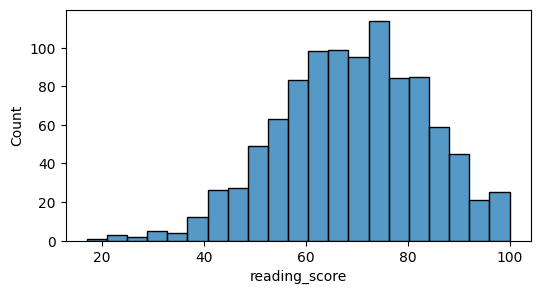

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='reading_score')


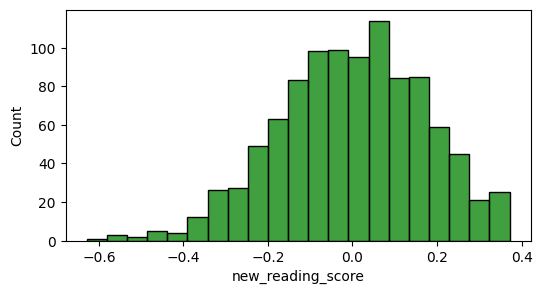

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(data=df,x='new_reading_score',color='Green')
plt.show()